## Here We predict wether the  patient have Diabetes  or not 

## Data - from Kaggle

https://www.kaggle.com/code/niteshyadav3103/diabetes-prediction-stacking-boosting/data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Own analysis

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
import seaborn as sns


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

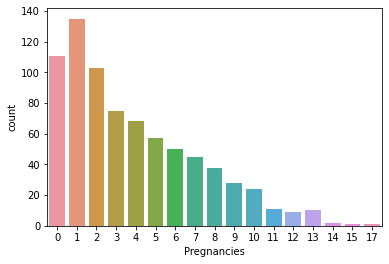

In [10]:
sns.countplot(df.Pregnancies)

In [11]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

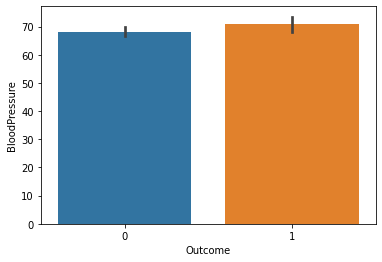

In [12]:
sns.barplot(y= 'BloodPressure',x= 'Outcome', data= df)

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
import matplotlib.pyplot as plt

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

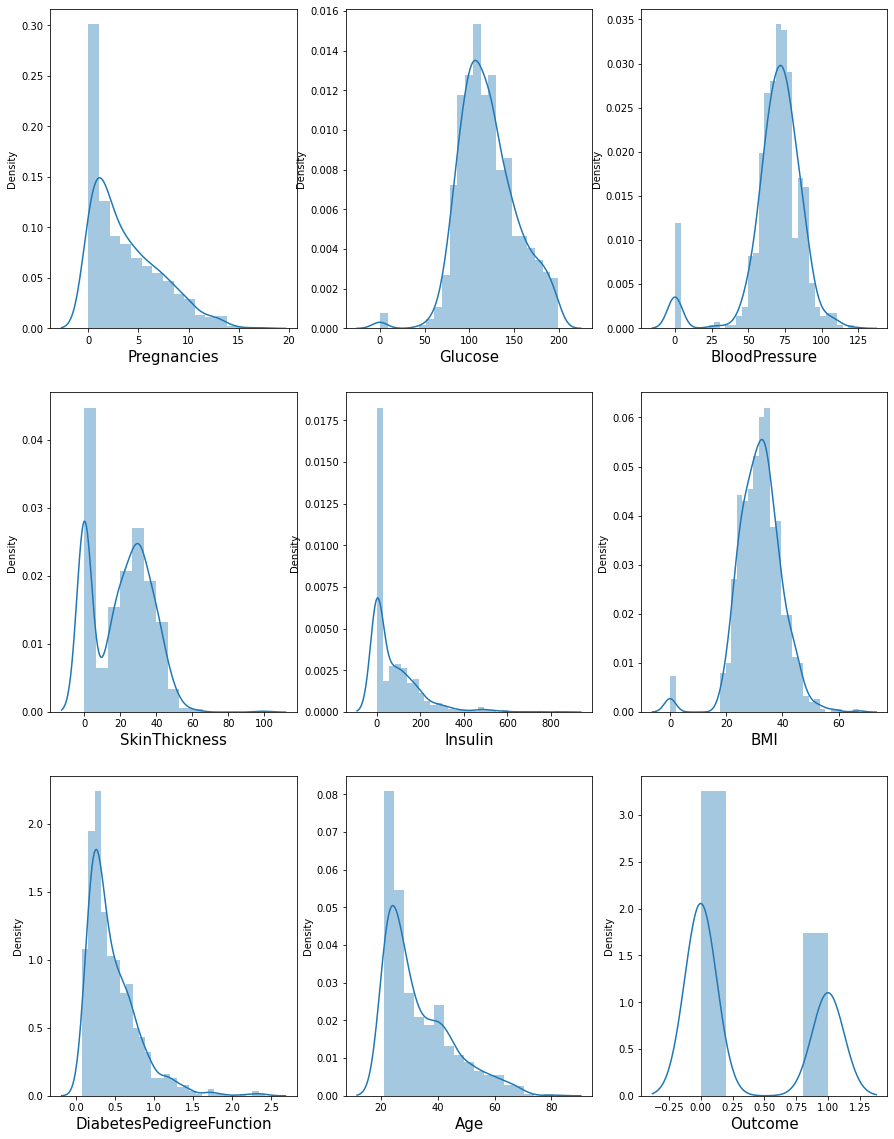

In [32]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber <= 9 :
        ax = plt.subplot(3, 3, plotnumber)
        
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    
    plotnumber +=1
    
plt.show()   

In [38]:
dataa.drop('Age' ,axis= 1, inplace=True)

In [44]:
dataa.columns.shape , df.columns.shape

((8,), (9,))

### We can see there is skewness in our data

In [15]:
data =  df 

In [16]:
# replace all zero number with its mean value or respective feature

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

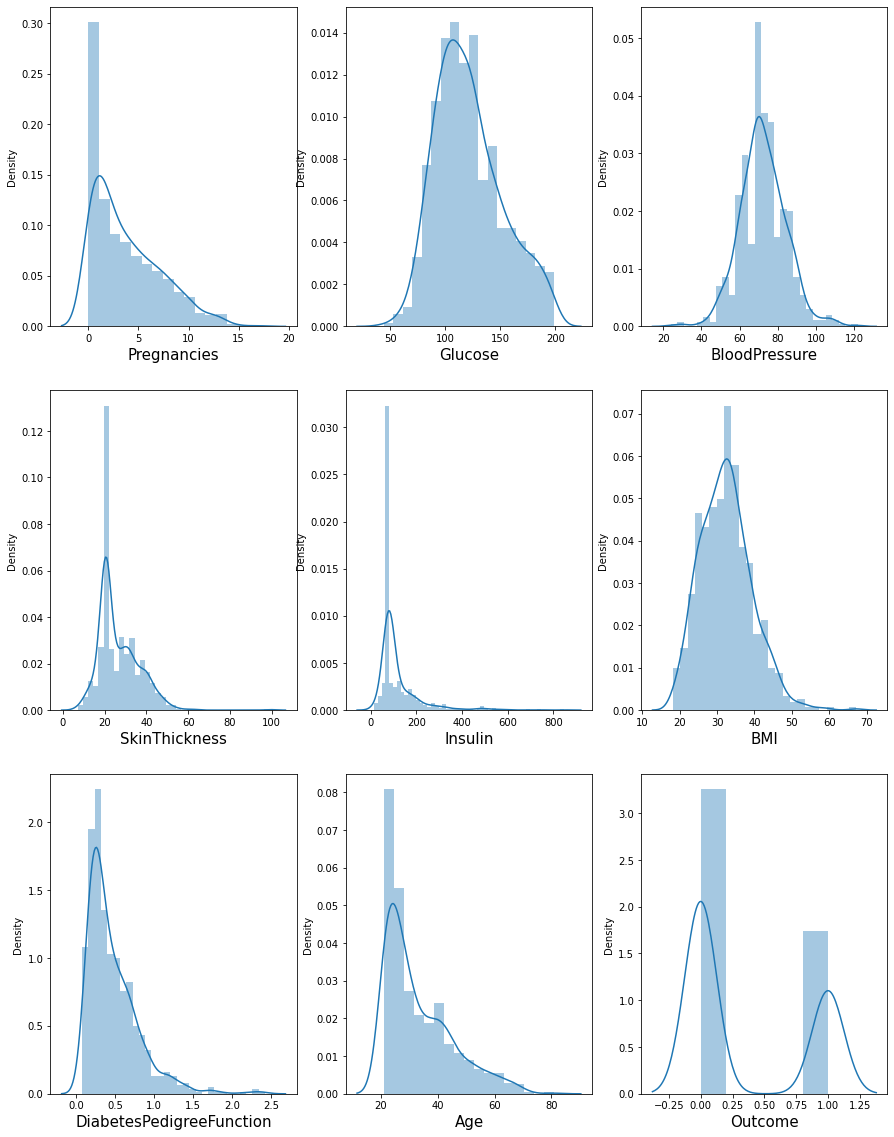

In [48]:
#  again after replacing 0 
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber <= 9 :
        ax = plt.subplot(3, 3, plotnumber)
        
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    
    plotnumber +=1
    
plt.show()   

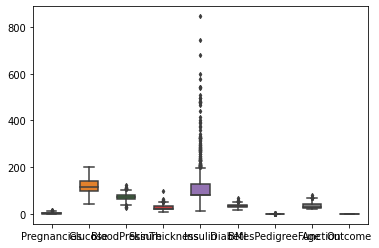

In [20]:
# plt.figure(figsize=(25,30))
sns.boxplot(data= df,width=0.5,fliersize = 3)
plt.show()

## Outlier detection

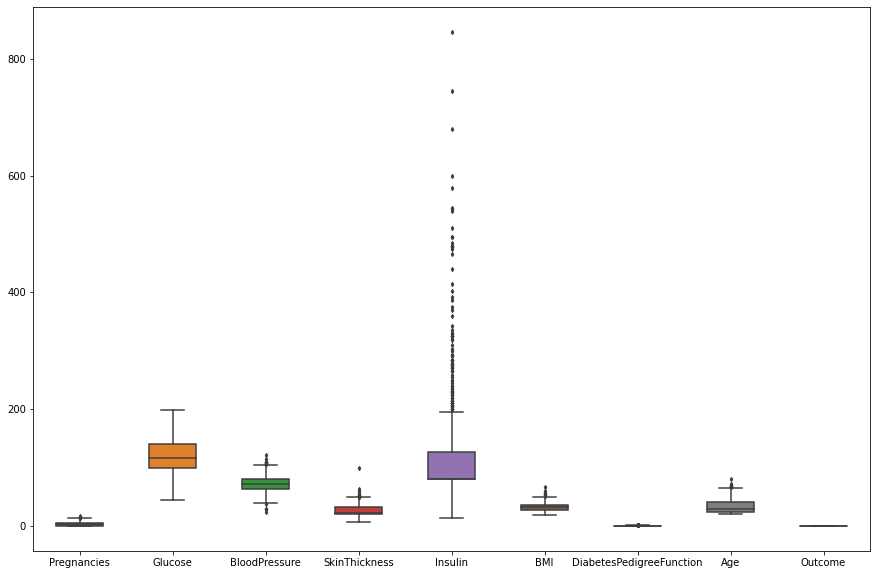

In [21]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [27]:
# most outliers in Insulin feature

In [29]:
outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

In [30]:

outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]


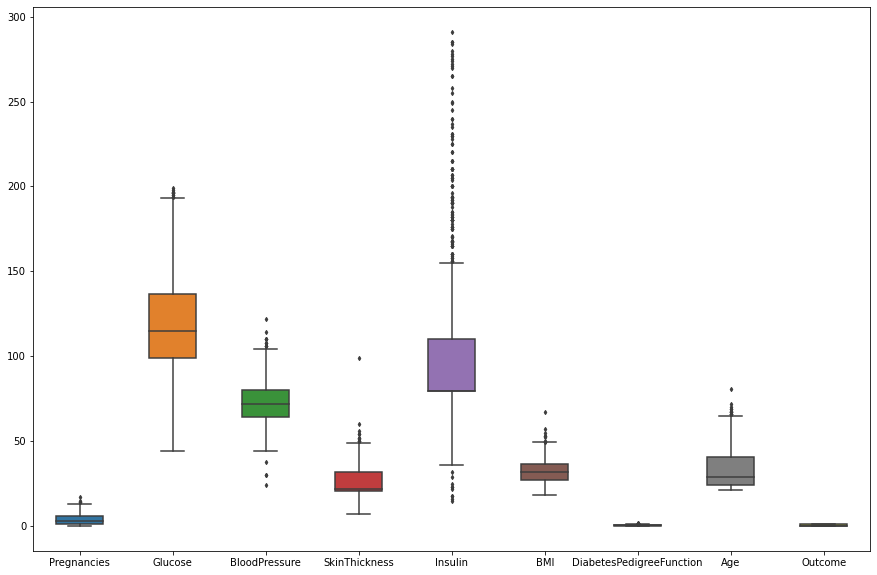

In [31]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [61]:
# will working with boxplot and heatmap and then ome here again 

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.Insulin.describe()

count    722.000000
mean     101.427155
std       49.713481
min       15.000000
25%       79.799479
50%       79.799479
75%      110.000000
max      291.000000
Name: Insulin, dtype: float64

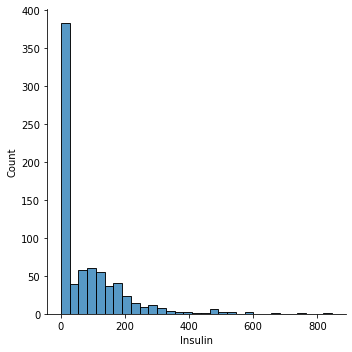

In [13]:
sns.displot(df.Insulin)

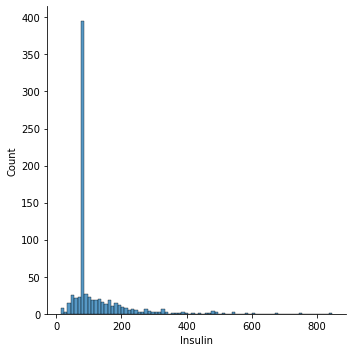

In [22]:
sns.displot(df.Insulin)

In [36]:
df = data

In [38]:
data.Insulin.value_counts()

79.799479     372
105.000000     11
140.000000      9
130.000000      9
120.000000      8
             ... 
255.000000      1
52.000000       1
51.000000       1
29.000000       1
112.000000      1
Name: Insulin, Length: 149, dtype: int64

In [18]:
df.Pregnancies.value_counts().head()

1    135
0    111
2    103
3     75
4     68
Name: Pregnancies, dtype: int64

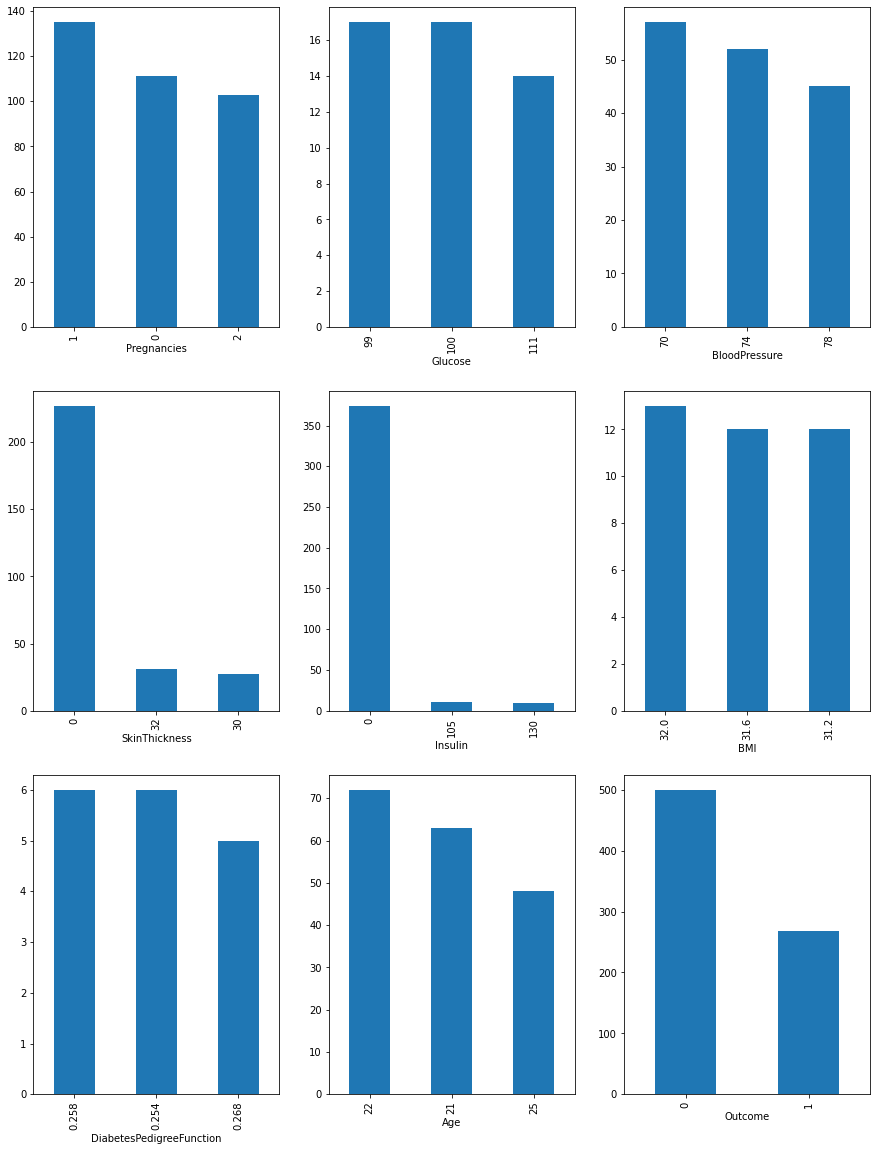

In [23]:
plt.figure(figsize=(15,20))
plotnumber1 = 1

for column in df :
    if plotnumber1 <=9 :
        axx= plt.subplot(3,3,plotnumber1)
        
        df[column].value_counts().head(3).plot(kind = 'bar')
        plt.xlabel(column, fontsize = 10)
        
    plotnumber1 +=1

plt.show()    

In [39]:
x= df.corr()

<AxesSubplot:>

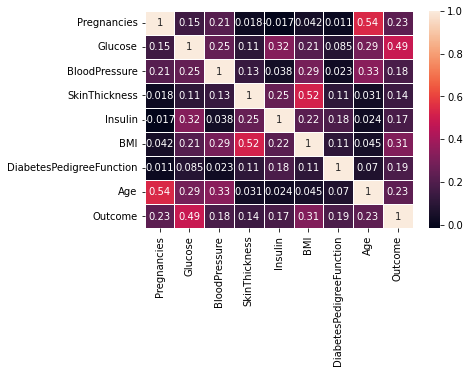

In [40]:
sns.heatmap(x,linewidths=0.5,annot=True)

In [41]:
data.Insulin.describe()

count    722.000000
mean     101.427155
std       49.713481
min       15.000000
25%       79.799479
50%       79.799479
75%      110.000000
max      291.000000
Name: Insulin, dtype: float64

## Model Selection

In [42]:
data.shape

(722, 9)

In [47]:
X = df.iloc[:,:8]

In [50]:
y = df.iloc[:,-1]

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standerdisation

In [95]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [96]:
X_train_scale

array([[ 0.03380967, -0.75145026, -1.00525828, ..., -0.57569307,
        -0.00980867, -0.98072675],
       [-1.18559241, -0.71771147,  0.79273067, ..., -1.0210143 ,
        -0.52334003, -0.98072675],
       [-1.18559241, -0.81892783,  1.03791099, ...,  0.78995868,
        -0.70878191, -0.80386902],
       ...,
       [ 0.64351071,  1.54278724, -0.35144411, ...,  0.22588513,
         0.66063505,  1.40685252],
       [-1.18559241, -1.76361386,  0.30237005, ...,  1.9626379 ,
        -0.89778998,  1.14156593],
       [-0.57589137, -0.92014419, -1.65907244, ..., -0.2936563 ,
        -1.08679805, -0.98072675]])

In [74]:
## just try to understand the Standerscaler

In [97]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [100]:
bold = df.iloc[:,1:3]

In [101]:
bold

,Glucose,BloodPressure
0,148.0,72.0
1,85.0,66.0
2,183.0,64.0
3,89.0,66.0
5,116.0,74.0
...,...,...
763,101.0,76.0
764,122.0,70.0
765,121.0,72.0
766,126.0,60.0


In [68]:
bold_scale = scaler.fit_transform(bold)

In [70]:
bold_dataframe = pd.DataFrame(bold_scale)

In [73]:
bold_dataframe.describe()

,0,1
count,7.220000e+02,7.220000e+02
mean,2.214295e-17,7.380984e-17
std,1.000693e+00,1.000693e+00
min,-2.571647e+00,-4.006220e+00
25%,-6.975905e-01,-6.904450e-01
50%,-1.524103e-01,-2.728987e-02
75%,5.886939e-01,6.358652e-01
max,2.709785e+00,4.117429e+00


In [72]:
bold

,Glucose,BloodPressure
0,148.0,72.0
1,85.0,66.0
2,183.0,64.0
3,89.0,66.0
5,116.0,74.0
...,...,...
763,101.0,76.0
764,122.0,70.0
765,121.0,72.0
766,126.0,60.0


## Time to prediction using Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
reg = LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [102]:
reg.fit(X_train_scale,y_train)

LogisticRegression()

In [103]:
y_pred = reg.predict(X_test_scale)

In [104]:
accuracy_score(y_test,y_pred)

0.850828729281768

In [105]:
confusion_matrix(y_test,y_pred)

array([[114,   7],
       [ 20,  40]], dtype=int64)

In [83]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.94      0.89       121\n           1       0.85      0.67      0.75        60\n\n    accuracy                           0.85       181\n   macro avg       0.85      0.80      0.82       181\nweighted avg       0.85      0.85      0.85       181\n'

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       121
           1       0.85      0.67      0.75        60

    accuracy                           0.85       181
   macro avg       0.85      0.80      0.82       181
weighted avg       0.85      0.85      0.85       181



## Create the result in the file form

In [108]:
a = pd.DataFrame(y_pred)

In [109]:
a

,0
0,1
1,0
2,0
3,0
4,0
...,...
176,0
177,1
178,0
179,1


In [107]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
131,9,122.0,56.0,20.536458,79.799479,33.3,1.114,33
262,4,95.0,70.0,32.000000,79.799479,32.1,0.612,24
401,6,137.0,61.0,20.536458,79.799479,24.2,0.151,55
730,3,130.0,78.0,23.000000,79.000000,28.4,0.323,34
17,7,107.0,74.0,20.536458,79.799479,29.6,0.254,31
...,...,...,...,...,...,...,...,...
277,0,104.0,64.0,23.000000,116.000000,27.8,0.454,23
306,10,161.0,68.0,23.000000,132.000000,25.5,0.326,47
85,2,110.0,74.0,29.000000,125.000000,32.4,0.698,27
391,5,166.0,76.0,20.536458,79.799479,45.7,0.340,27


In [125]:
final_file = pd.concat([X_test,a],axis = 1,join='inner')


In [126]:
X_test.shape,y_test.shape

((181, 8), (181,))

In [127]:
final_file = final_file.iloc[:,-1]

In [128]:
final_file

131    1
17     0
83     0
93     0
152    1
10     0
43     0
34     0
1      0
87     1
63     0
30     0
112    1
168    0
57     0
167    0
12     0
76     0
173    1
55     0
122    0
40     1
52     0
21     1
84     0
72     0
60     0
127    0
105    1
20     1
49     0
70     0
150    0
136    0
155    0
24     0
38     0
85     0
Name: 0, dtype: int64

In [129]:
final_file.to_csv('Diabetis_submission.csv')

In [132]:
final_csv = pd.read_csv('Diabetis_submission.csv')

In [133]:
final_csv.head()

,Unnamed: 0,0
0,131,1
1,17,0
2,83,0
3,93,0
4,152,1


In [136]:
final_csv.rename(columns={'0':'Prediction'},inplace=True)

In [138]:
final_csv.rename(columns={'Unnamed: 0':'Sr_Number'}, inplace= True)

In [139]:
final_csv

,Sr_Number,Prediction
0,131,1
1,17,0
2,83,0
3,93,0
4,152,1
5,10,0
6,43,0
7,34,0
8,1,0
9,87,1


# Done !